In [1]:
# import libraries and dependencies
import os
import glob
import cv2 
import mtcnn
from mtcnn.mtcnn import MTCNN
from PIL import Image

2021-10-10 17:53:48.357933: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-10 17:53:48.357993: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Source folder for images
datadir = '../data/images-custom/'

SourceFolder = 'sethfaces'
SourceFolder = datadir + SourceFolder

# Get a list of all jpg image filenames in the source directory 
jpgFilenamesList = glob.glob(SourceFolder + '/' + '*.jpg')


In [4]:
im = plt.imread(jpgFilenamesList[0])
print("Shape of the input images:", im.shape)
HEIGHT = im.shape[0] 
WIDTH = im.shape[1]
CHANNELS = im.shape[2]

Shape of the input images: (400, 300, 3)


In [5]:

images = np.empty((len(jpgFilenamesList), im.shape[0], im.shape[1], im.shape[2]))
images.shape
plt.imread(jpgFilenamesList[0])

array([[[159, 142, 116],
        [112,  95,  69],
        [ 93,  75,  51],
        ...,
        [ 22,  14,  11],
        [ 28,  19,  14],
        [ 33,  24,  19]],

       [[114,  97,  71],
        [120, 102,  78],
        [123, 105,  81],
        ...,
        [ 27,  17,  15],
        [ 30,  21,  16],
        [ 32,  23,  18]],

       [[100,  82,  60],
        [131, 113,  91],
        [148, 130, 108],
        ...,
        [ 28,  19,  14],
        [ 29,  20,  15],
        [ 30,  21,  16]],

       ...,

       [[111,  95,  82],
        [134, 116, 102],
        [143, 125, 111],
        ...,
        [127,  78,  63],
        [112,  64,  50],
        [102,  56,  41]],

       [[106,  90,  77],
        [135, 117, 103],
        [148, 130, 116],
        ...,
        [121,  72,  57],
        [107,  59,  45],
        [ 97,  51,  36]],

       [[110,  94,  81],
        [141, 123, 109],
        [157, 139, 125],
        ...,
        [115,  66,  51],
        [102,  54,  40],
        [ 94,  48,  33]]

In [6]:

# read in images
for idx, filename in enumerate(jpgFilenamesList):
    im = plt.imread(filename)
    im_norm = im.astype('float32') / 255. 
    images[idx] = im_norm
    

In [7]:
images.shape

(53, 400, 300, 3)

NameError: name 'X' is not defined

In [18]:
hist=autoencoder.fit(images, images,
                epochs=10,
                shuffle=True,
                validation_data=(images, images)
                )

Epoch 1/10
2/2 [==============================] - 55s 33s/step - loss: 0.9580 - val_loss: 0.4399
Epoch 2/10
2/2 [==============================] - 42s 25s/step - loss: 0.8661 - val_loss: 0.4398
Epoch 3/10
2/2 [==============================] - 37s 21s/step - loss: 0.7699 - val_loss: 0.4395
Epoch 4/10
2/2 [==============================] - 42s 25s/step - loss: 0.6664 - val_loss: 0.4392
Epoch 5/10
2/2 [==============================] - 39s 24s/step - loss: 0.5838 - val_loss: 0.4390
Epoch 6/10
2/2 [==============================] - 37s 22s/step - loss: 0.5257 - val_loss: 0.4387
Epoch 7/10
2/2 [==============================] - 36s 20s/step - loss: 0.4890 - val_loss: 0.4384
Epoch 8/10
2/2 [==============================] - 36s 22s/step - loss: 0.4599 - val_loss: 0.4382
Epoch 9/10
2/2 [==============================] - 38s 20s/step - loss: 0.4308 - val_loss: 0.4379
Epoch 10/10
2/2 [==============================] - 34s 20s/step - loss: 0.4007 - val_loss: 0.4375


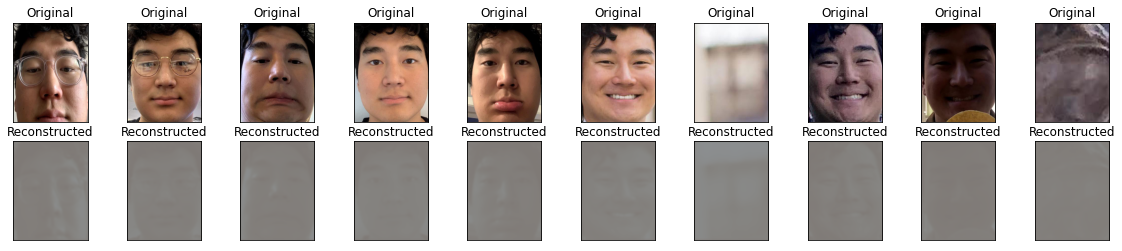

In [29]:
decoded_imgs = autoencoder.predict(images)
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(images[i].reshape(HEIGHT, WIDTH, CHANNELS))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    plt.title("Original")
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.title("Reconstructed")
    plt.imshow(decoded_imgs[i].reshape(HEIGHT, WIDTH, CHANNELS))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()